In [88]:
from sklearn import mixture
import sys 
sys.path.append('..')
import os
import numpy as np
from matplotlib.pyplot import *
import numpy as np
import torch
import nibabel as nib
import torch.utils.data as utils
from models.vae_gmm import Net_GMM

In [89]:
mcmc_samples = 100
slice_index = 70
tau = 1

In [90]:
data_dir = '/home/moucheng/projects_data/HCP/103818_1'

directory = data_dir
bvals = np.loadtxt(directory + '/T1w/Diffusion/bvals')
bvals *= 1e-03

bvecs = np.loadtxt(directory + '/T1w/Diffusion/bvecs')
bvecs = np.transpose(bvecs)

grad = np.concatenate((bvecs, bvals[:, None]), axis=1)

img = nib.load(directory + '/T1w/Diffusion/data.nii.gz')
mask = nib.load(directory + '/T1w/Diffusion/nodif_brain_mask.nii.gz')
img = img.get_fdata()
mask = mask.get_fdata()

nvoxtotal = np.prod(np.shape(img)[0:3])
nvol = np.shape(img)[3]
imgvox = np.reshape(img, (nvoxtotal, nvol))

masktmp = np.zeros(np.shape(mask))
masktmp[:, :, slice_index] = mask[:, :, slice_index]
mask = masktmp
maskvox = np.reshape(mask, (nvoxtotal))

imgvoxtofit = imgvox[maskvox == 1]

normvol = np.where(bvals == min(bvals))

imgvoxtofitnorm = imgvoxtofit / (np.tile(np.mean(imgvoxtofit[:, normvol], axis=2), (1, nvol)))

b_values_no0 = torch.FloatTensor(bvals)
gradient_directions_no0 = torch.FloatTensor(bvecs)

In [186]:
# load the trained model GMM
path = '/home/moucheng/projects/2023_03_09b_MICCAI_mri/models_hpc/gaussian/gaussian_dim_5_par_5_mri_ball_stick_std_1.0_lr_0.001_epoch_200_alpha_0.0001_anneal_1e-05_act_prelu_warm_0.3'
name = 'gaussian_dim_5_par_5_mri_ball_stick_std_1.0_lr_0.001_epoch_200_alpha_0.0001_anneal_1e-05_act_prelu_warm_0.3.pt'
model = torch.load(os.path.join(path, name))

In [187]:
latent_d1 = []
latent_d2 = []
latent_d3 = []
latent_d4 = []
latent_d5 = []

example = 0

# model.train()

for j in range(300):
    for i, X_batch in enumerate(trainloader):
        outputs = model.forward(X_batch)
        latent = outputs['latent'][example, :]
#         y = outputs['y'][example, :]
#         print(y)
#         y_, y = torch.max(y, dim=-1)
#         print(y)
#         print(y_)
        latent_d1.append(latent.detach().numpy()[0])
        latent_d2.append(latent.detach().numpy()[1])
        latent_d3.append(latent.detach().numpy()[2])
        latent_d4.append(latent.detach().numpy()[3])
        latent_d5.append(latent.detach().numpy()[4])
#         print(latent)

print('done')

done


In [188]:
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# x = latent_d2
# y = [latent_d5]

# colors = cm.rainbow(np.linspace(0, 1, len(y)))

# for i in range(len(y)):
#     plt.scatter(x, y[i], color=colors[i], vmin=-3, vmax=3)

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
# plt.show()

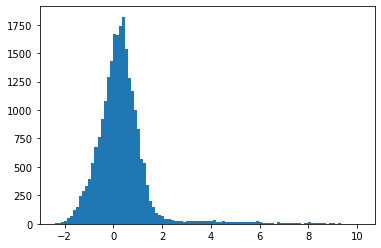

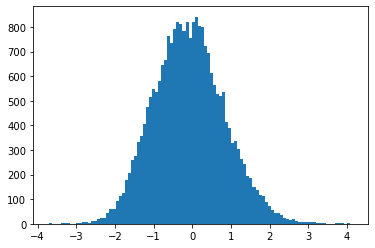

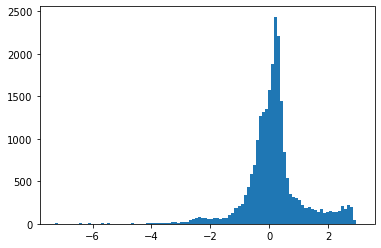

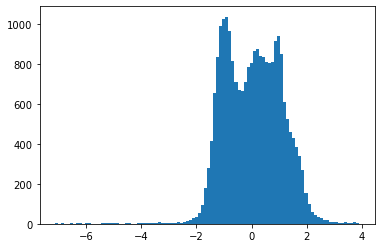

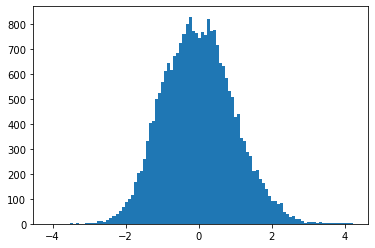

In [189]:
# x = latent_d2
# y = [latent_d1, latent_d4]

# colors = cm.rainbow(np.linspace(0, 1, len(y)))

# for i in range(len(y)):
#     plt.scatter(x, y[i], color=colors[i], vmin=-3, vmax=3)

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
# plt.show()
plt.hist(latent_d1, bins=100)
plt.show()

plt.hist(latent_d2, bins=100)
plt.show()

plt.hist(latent_d3, bins=100)
plt.show()

plt.hist(latent_d4, bins=100)
plt.show()

plt.hist(latent_d5, bins=100)
plt.show()

done


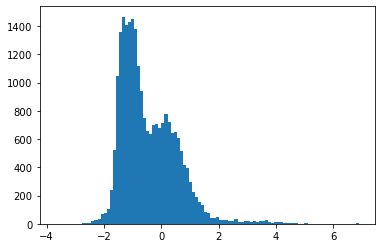

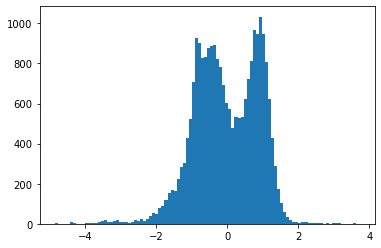

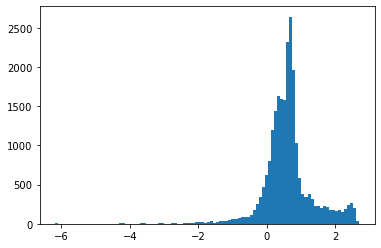

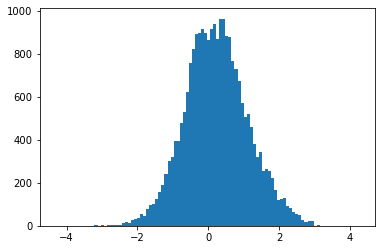

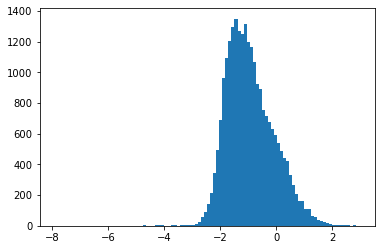

In [191]:
# load the trained model GMM
path = '/home/moucheng/projects/2023_03_09b_MICCAI_mri/models_hpc/gmm/gmm_dim_5_par_5_k_3_mri_ball_stick_std_1.0_lr_0.001_tau_0.5_epoch_300_alpha_0.0001_anneal_1e-05_act_prelu_warm_0.2'
name = 'gmm_dim_5_par_5_k_3_mri_ball_stick_std_1.0_lr_0.001_tau_0.5_epoch_300_alpha_0.0001_anneal_1e-05_act_prelu_warm_0.2.pt'
model = torch.load(os.path.join(path, name))

latent_d1_gmm = []
latent_d2_gmm = []
latent_d3_gmm = []
latent_d4_gmm = []
latent_d5_gmm = []

example = 0

# model.train()

for j in range(300):
    for i, X_batch in enumerate(trainloader):
        outputs = model.forward(X_batch)
        latent = outputs['latent'][example, :]
#         y = outputs['y'][example, :]
#         print(y)
#         y_, y = torch.max(y, dim=-1)
#         print(y)
#         print(y_)
        latent_d1_gmm.append(latent.detach().numpy()[0])
        latent_d2_gmm.append(latent.detach().numpy()[1])
        latent_d3_gmm.append(latent.detach().numpy()[2])
        latent_d4_gmm.append(latent.detach().numpy()[3])
        latent_d5_gmm.append(latent.detach().numpy()[4])
#         print(latent)

print('done')

plt.hist(latent_d1_gmm, bins=100)
plt.show()

plt.hist(latent_d2_gmm, bins=100)
plt.show()

plt.hist(latent_d3_gmm, bins=100)
plt.show()

plt.hist(latent_d4_gmm, bins=100)
plt.show()

plt.hist(latent_d5_gmm, bins=100)
plt.show()

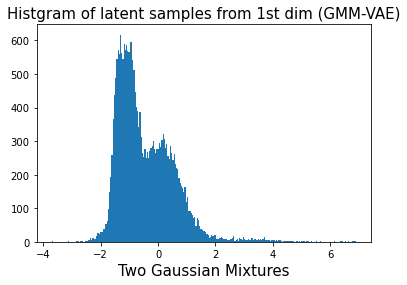

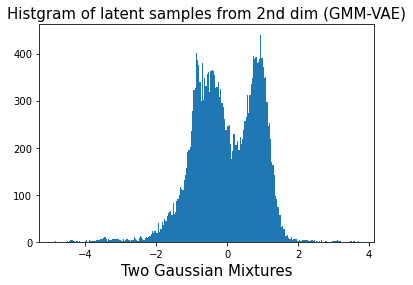

In [214]:
fig = plt.figure()
plt.hist(latent_d1_gmm, bins=250)
plt.title('Histgram of latent samples from 1st dim (GMM-VAE)', fontsize=15)
plt.xlabel('Two Gaussian Mixtures', fontsize=15)
plt.savefig('/home/moucheng/projects/2023_03_09_MICCAI/gmm_d1.png')
plt.show()

fig = plt.figure()
plt.hist(latent_d2_gmm, bins=250)
plt.title('Histgram of latent samples from 2nd dim (GMM-VAE)', fontsize=15)
plt.xlabel('Two Gaussian Mixtures', fontsize=15)
plt.savefig('/home/moucheng/projects/2023_03_09_MICCAI/gmm_d2.png')
plt.show()

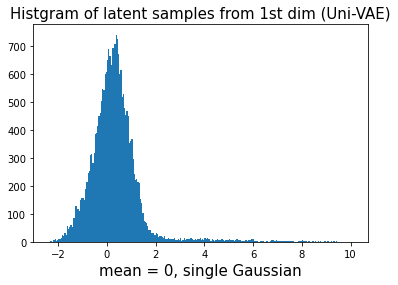

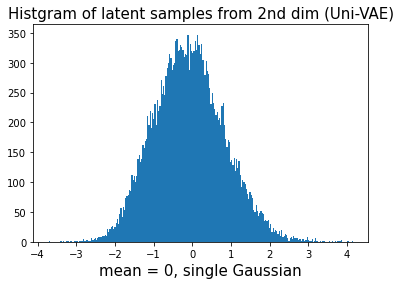

In [215]:
fig = plt.figure()
plt.hist(latent_d1, bins=250)
plt.title('Histgram of latent samples from 1st dim (Uni-VAE)', fontsize=15)
plt.xlabel('mean = 0, single Gaussian', fontsize=15)
plt.savefig('/home/moucheng/projects/2023_03_09_MICCAI/vae_d1.png')
plt.show()

fig = plt.figure()
plt.hist(latent_d2, bins=250)
plt.title('Histgram of latent samples from 2nd dim (Uni-VAE)', fontsize=15)
plt.xlabel('mean = 0, single Gaussian', fontsize=15)
plt.savefig('/home/moucheng/projects/2023_03_09_MICCAI/vae_d2.png')
plt.show()